In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Not used

theta = 4.777817083964137


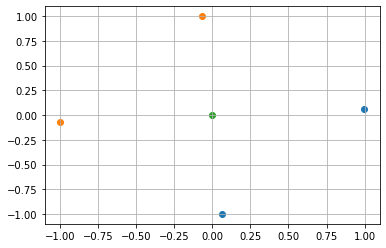

<Figure size 432x432 with 0 Axes>

In [2]:

def randONB2d():
    theta = np.random.uniform() * 2*np.pi
    print(f'theta = {theta}')
    vec1 = np.array([np.cos(theta), np.sin(theta)])
    vec2 = np.array([-vec1[1], vec1[0]])
    return np.array([vec1, vec2])

basis = randONB2d()
plt.scatter(basis[:,0], basis[:,1])
plt.scatter(-basis[:,0], -basis[:,1])
plt.scatter(0,0)
plt.grid()
plt.figure(figsize=(6,6));

## Evolution Method

In [3]:
def rho_eigenbase(N, pure=False):
    if pure:
        # One diagonal is 1, else 0
        rnum = np.random.randint(N)
        rho = np.zeros(N)
        rho[rnum] = 1
        return np.diag(rho)
    
    # Mixed states
    rho = np.random.uniform(size=N)
    return np.diag(rho/np.sum(rho))

# Check created matrices
print('Pure state in eigenbase:')
rho_eigenbase(3, pure=True)

print('Mixed state in eigenbase:')
mat = rho_eigenbase(3, pure=False)
mat
np.trace(mat)

Pure state in eigenbase:
Mixed state in eigenbase:


0.9999999999999999

In [4]:
def create_unitary(N):
    rand_mat = np.random.uniform(size=(N,N))
    q, _ = np.linalg.qr(rand_mat)
    return q, np.matrix(q).H 

# Check Unitarity
U, U_dag = create_unitary(3)
np.round( U.dot(U_dag), 10)
    

array([[ 1., -0., -0.],
       [-0.,  1.,  0.],
       [-0.,  0.,  1.]])

In [5]:
def rho_arbitrary(N, pure=False):
    rho = rho_eigenbase(N, pure)
    U, U_dag = create_unitary(N)
    return( U.dot( rho.dot(U_dag)))


# Check the generator
for N in range(10):
    rho = rho_arbitrary(N)

    ## Check trace condition
    assert np.abs( np.trace(rho)-1 ) < 1e10

    ## Check Positivity
    assert np.all(np.linalg.eigvals(rho) >= 0)
